<a href="https://colab.research.google.com/github/vethavarshinii/traffic-accident-data/blob/main/TASK5_ACCIDENT_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-ef13d7a5b367>:9: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crash_Data.csv')


Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')
Error: Unable to convert 'Time' column to datetime.
Saturday     1177
Sunday       1079
Friday       1040
Thursday      924
Monday        870
Wednesday     859
Tuesday       838
Name: Dayweek, dtype: int64
National or State Highway    1847
Arterial Road                1562
Local Road                   1286
Sub-arterial Road            1036
Collector Road                476
ARTERIAL ROAD                 191
NATIONAL OR STATE HIGHWAY     152
LOCAL ROAD                    124
Access road                    91
Undetermined                   14
Pedestrian Tho

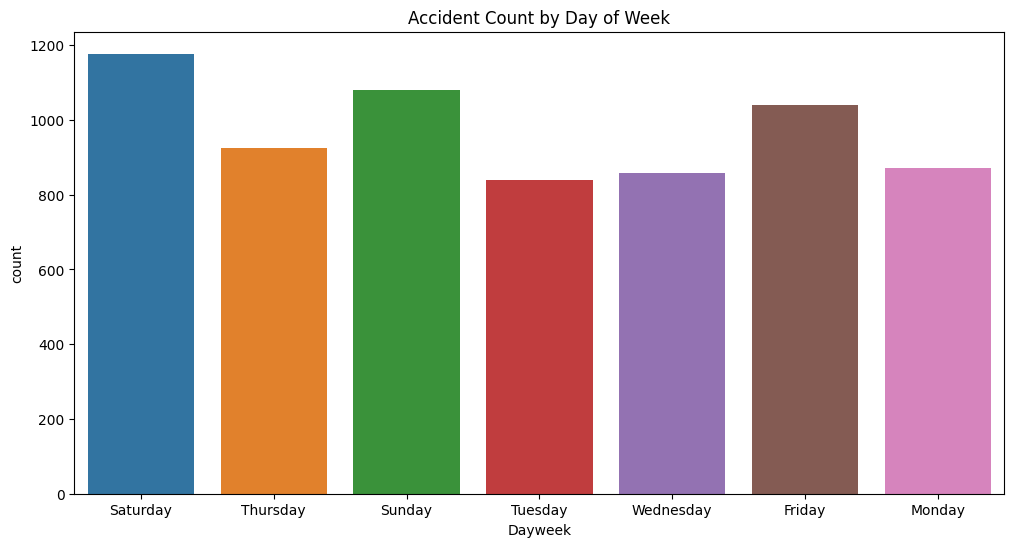

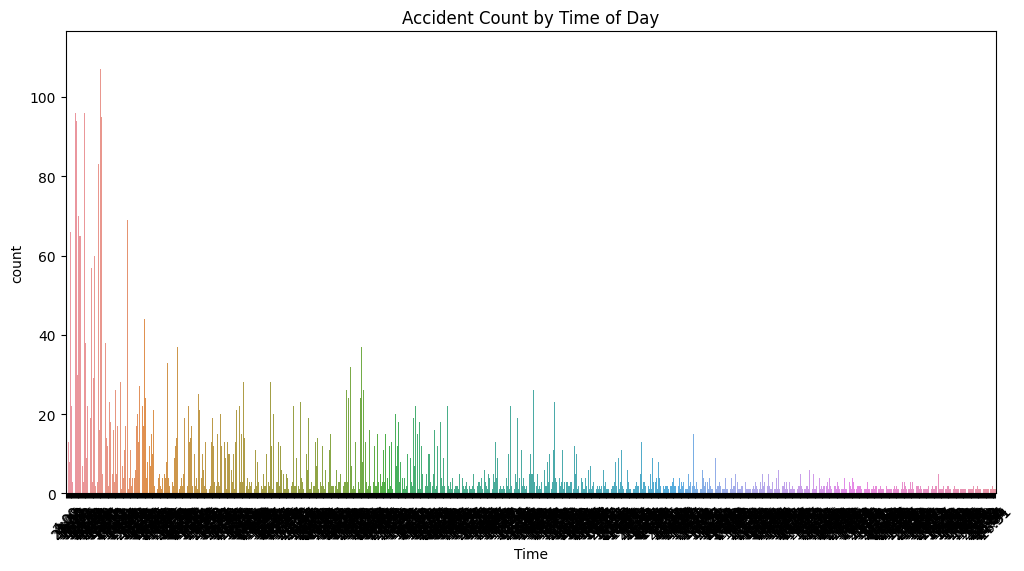

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
df = pd.read_csv('Crash_Data.csv')

# Display the column names in the dataset
print(df.columns)

# 1. Data Cleaning and Preparation
# Handle missing values if any
df = df.dropna()  # Placeholder for handling missing values

# Convert time-related columns to a consistent format
try:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
except ValueError:
    print("Error: Unable to convert 'Time' column to datetime.")

# 2. Exploratory Data Analysis (EDA)
# Explore distribution of categorical variables
print(df['Dayweek'].value_counts())
print(df['National Road Type'].value_counts())
# ... (continue with other categorical variables)

# Accident trends over times of the day and road types
plt.figure(figsize=(12, 6))
sns.countplot(x='Dayweek', data=df)
plt.title('Accident Count by Day of Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=df)
plt.title('Accident Count by Time of Day')
plt.xticks(rotation=45)
plt.show()

# 3. Visualizations (Continued)
# Example: Relationship between numeric features and crash type
numeric_features = ['Speed Limit', 'Age']

for feature in numeric_features:
    try:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Crash Type', y=feature, data=df)
        plt.title(f'{feature} vs. Crash Type')
        plt.show()
    except ValueError as e:
        print(f"Error: {e}")

# 4. Feature Engineering (Continued)
# Example: Create a new feature representing whether it's a weekday or weekend
df['Weekend'] = df['Dayweek'].isin(['Saturday', 'Sunday']).astype(int)

# 5. Identify Patterns (Example: Correlation Matrix)
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Machine Learning (Optional)
# Build a machine learning model to predict crash type
# Assuming 'Crash Type' is the target variable
X = df.drop(['Crash Type'], axis=1)
y = df['Crash Type']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Conclusion and Recommendations (Continued)
# Example: Provide key findings and recommendations based on the analysis
print("Key Findings:")
# ...

print("Recommendations:")
# ...

# Save the modified DataFrame with additional features
df.to_csv('Crash_Data_processed.csv', index=False)  # Update the filename